In [1]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error


# Keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras.callbacks import EarlyStopping
from keras import utils

# Utility
import numpy as np
import time

In [2]:
#Importing Dataset
data = pd.read_csv('Datasets/cleaned_data.csv')
data = data.drop(['Unnamed: 0'], axis = 1)

In [3]:
# making a new dataset with only numerical data
numer_data = data.select_dtypes(include=['float64','int64'])
numer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_tracks      1605 non-null   float64
 1   duration_ms       1605 non-null   float64
 2   popularity        1605 non-null   float64
 3   danceability      1605 non-null   float64
 4   energy            1605 non-null   float64
 5   key               1605 non-null   float64
 6   loudness          1605 non-null   float64
 7   mode              1605 non-null   float64
 8   speechiness       1605 non-null   float64
 9   acousticness      1605 non-null   float64
 10  instrumentalness  1605 non-null   float64
 11  liveness          1605 non-null   float64
 12  valence           1605 non-null   float64
 13  tempo             1605 non-null   float64
 14  time_signature    1605 non-null   float64
dtypes: float64(15)
memory usage: 188.2 KB


## Machine Learning model - Neural Network

In [4]:
# Split into train and test dataset.
data_train, data_test = train_test_split(numer_data, test_size=0.2, random_state=42)
print("TRAIN size:", len(data_train))
print("TEST size:", len(data_test))

TRAIN size: 1284
TEST size: 321


In [5]:
x_train = data_train.drop(['popularity', 'time_signature'], axis = 1).values
x_train

array([[0.15730337, 0.09964049, 0.51372998, ..., 0.07922191, 0.73766722,
        0.19585245],
       [0.15730337, 0.11664177, 0.86498856, ..., 0.32297327, 0.84009197,
        0.21596757],
       [0.        , 0.0158407 , 0.5778032 , ..., 0.09910889, 0.61747492,
        0.74232817],
       ...,
       [0.06741573, 0.01706077, 0.55949657, ..., 0.07063682, 0.18373746,
        0.52616999],
       [0.12359551, 0.13909014, 0.20251716, ..., 0.15018474, 0.20150502,
        0.2587964 ],
       [0.        , 0.10395394, 0.67048055, ..., 0.02814606, 0.61433946,
        0.47431287]])

In [6]:
x_test = data_test.drop(['popularity', 'time_signature'], axis = 1).values
x_test

array([[0.12359551, 0.13789252, 0.3604119 , ..., 0.13605738, 0.4868311 ,
        0.50039392],
       [0.31460674, 0.11990352, 0.21853547, ..., 0.24581613, 0.31229097,
        0.27583008],
       [0.12359551, 0.08965882, 0.63386728, ..., 0.00652032, 0.94042642,
        0.24561927],
       ...,
       [0.19101124, 0.1286292 , 0.43592677, ..., 0.11649641, 0.51400502,
        0.19023597],
       [0.08988764, 0.2032622 , 0.13501144, ..., 0.10128233, 0.00668896,
        0.49878013],
       [0.        , 0.04507634, 0.60755149, ..., 0.33166703, 0.5882107 ,
        0.67628372]])

In [7]:
y_train = data_train['popularity'].values
y_train

array([0.7311828 , 0.68817204, 0.70967742, ..., 0.38709677, 0.7311828 ,
       0.29032258])

In [8]:
y_test = data_test['popularity'].values
y_test

array([0.79569892, 0.6344086 , 0.80645161, 0.        , 0.6344086 ,
       0.83870968, 0.58064516, 0.52688172, 0.56989247, 0.8172043 ,
       0.55913978, 0.07526882, 0.35483871, 0.37634409, 0.41935484,
       0.67741935, 0.90322581, 0.46236559, 0.8172043 , 0.78494624,
       0.75268817, 0.92473118, 0.47311828, 0.50537634, 0.75268817,
       0.62365591, 0.91397849, 0.5483871 , 0.49462366, 0.64516129,
       0.89247312, 0.66666667, 0.67741935, 0.70967742, 0.68817204,
       0.68817204, 0.03225806, 0.50537634, 0.84946237, 0.68817204,
       0.49462366, 0.83870968, 0.74193548, 0.65591398, 0.62365591,
       0.88172043, 0.61290323, 0.72043011, 0.67741935, 0.53763441,
       0.51612903, 0.78494624, 0.53763441, 0.61290323, 0.34408602,
       0.70967742, 0.56989247, 0.75268817, 0.7311828 , 0.27956989,
       0.13978495, 0.74193548, 0.07526882, 0.25806452, 0.77419355,
       0.49462366, 0.5483871 , 0.82795699, 0.70967742, 0.75268817,
       0.50537634, 0.90322581, 0.34408602, 0.79569892, 0.66666

In [9]:
# Building Model
callback = EarlyStopping(monitor='val_loss', patience=8)
model = Sequential()
  
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mse')

model_1 = Sequential()
  
model_1.add(Dense(15, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(5, activation='relu'))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')

model_2 = Sequential()
  
model_2.add(Dense(43, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mse')

2022-04-23 16:52:04.147933: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.fit(x=x_train, y=y_train, epochs=80, 
          validation_data=(x_test,y_test),
         callbacks = callback)

Epoch 1/80
41/41 [==============================] - 2s 14ms/step - loss: 0.2686 - val_loss: 0.1093
Epoch 2/80
41/41 [==============================] - 0s 5ms/step - loss: 0.2043 - val_loss: 0.0888
Epoch 3/80
41/41 [==============================] - 0s 5ms/step - loss: 0.1565 - val_loss: 0.0795
Epoch 4/80
41/41 [==============================] - 0s 5ms/step - loss: 0.1326 - val_loss: 0.0685
Epoch 5/80
41/41 [==============================] - 0s 4ms/step - loss: 0.1122 - val_loss: 0.0626
Epoch 6/80
41/41 [==============================] - 0s 5ms/step - loss: 0.0898 - val_loss: 0.0601
Epoch 7/80
41/41 [==============================] - 0s 5ms/step - loss: 0.0821 - val_loss: 0.0555
Epoch 8/80
41/41 [==============================] - 0s 5ms/step - loss: 0.0778 - val_loss: 0.0549
Epoch 9/80
41/41 [==============================] - 0s 6ms/step - loss: 0.0701 - val_loss: 0.0522
Epoch 10/80
41/41 [==============================] - 0s 5ms/step - loss: 0.0656 - val_loss: 0.0515
Epoch 11/80
41/41 

<AxesSubplot:>

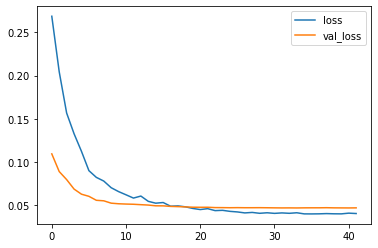

In [11]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [12]:
predictions = model.predict(x_test)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)

,Predict,Actual
0,0.601096,0.795699
1,0.603174,0.634409
2,0.630815,0.806452
3,0.632751,0.000000
4,0.600430,0.634409
5,0.624470,0.838710
6,0.618026,0.580645
7,0.612042,0.526882
8,0.644875,0.569892
9,0.689910,0.817204


In [13]:
mean_absolute_error(y_test,predictions)

0.17030693836273333

In [14]:
print("RMSE: ")
np.sqrt(mean_squared_error(y_test,predictions))

RMSE: 


0.21627627672370023

In [15]:
model_1.fit(x=x_train, y=y_train, epochs=80, 
          validation_data=(x_test,y_test),
         callbacks = callback)

Epoch 1/80
41/41 [==============================] - 2s 14ms/step - loss: 0.2376 - val_loss: 0.0725
Epoch 2/80
41/41 [==============================] - 0s 4ms/step - loss: 0.1036 - val_loss: 0.0566
Epoch 3/80
41/41 [==============================] - 0s 4ms/step - loss: 0.0826 - val_loss: 0.0526
Epoch 4/80
41/41 [==============================] - 0s 5ms/step - loss: 0.0687 - val_loss: 0.0513
Epoch 5/80
41/41 [==============================] - 0s 7ms/step - loss: 0.0616 - val_loss: 0.0522
Epoch 6/80
41/41 [==============================] - 0s 4ms/step - loss: 0.0580 - val_loss: 0.0528
Epoch 7/80
41/41 [==============================] - 0s 4ms/step - loss: 0.0500 - val_loss: 0.0497
Epoch 8/80
41/41 [==============================] - 0s 5ms/step - loss: 0.0490 - val_loss: 0.0509
Epoch 9/80
41/41 [==============================] - 0s 5ms/step - loss: 0.0461 - val_loss: 0.0500
Epoch 10/80
41/41 [==============================] - 0s 6ms/step - loss: 0.0441 - val_loss: 0.0489
Epoch 11/80
41/41 

<AxesSubplot:>

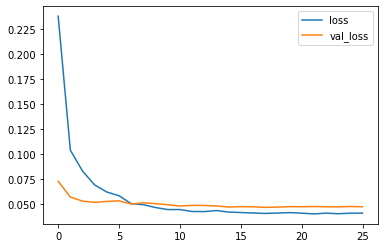

In [16]:
model_1_losses = pd.DataFrame(model_1.history.history)
model_1_losses.plot()

In [17]:
predictions = model_1.predict(x_test)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)

,Predict,Actual
0,0.577694,0.795699
1,0.541640,0.634409
2,0.629301,0.806452
3,0.585806,0.000000
4,0.565434,0.634409
5,0.607618,0.838710
6,0.520709,0.580645
7,0.601711,0.526882
8,0.621118,0.569892
9,0.644678,0.817204


In [18]:
mean_absolute_error(y_test,predictions)

0.1744141442286239

In [19]:
print("RMSE: ")
np.sqrt(mean_squared_error(y_test,predictions))

RMSE: 


0.21668850911071708

In [20]:
model_2.fit(x=x_train, y=y_train, epochs=80, 
          validation_data=(x_test,y_test))

Epoch 1/80
41/41 [==============================] - 3s 16ms/step - loss: 0.3703 - val_loss: 0.0759
Epoch 2/80
41/41 [==============================] - 0s 6ms/step - loss: 0.1222 - val_loss: 0.0706
Epoch 3/80
41/41 [==============================] - 0s 6ms/step - loss: 0.0900 - val_loss: 0.0632
Epoch 4/80
41/41 [==============================] - 0s 6ms/step - loss: 0.0742 - val_loss: 0.0523
Epoch 5/80
41/41 [==============================] - 0s 7ms/step - loss: 0.0711 - val_loss: 0.0555
Epoch 6/80
41/41 [==============================] - 0s 10ms/step - loss: 0.0652 - val_loss: 0.0507
Epoch 7/80
41/41 [==============================] - 0s 7ms/step - loss: 0.0610 - val_loss: 0.0537
Epoch 8/80
41/41 [==============================] - 0s 7ms/step - loss: 0.0582 - val_loss: 0.0508
Epoch 9/80
41/41 [==============================] - 0s 6ms/step - loss: 0.0566 - val_loss: 0.0519
Epoch 10/80
41/41 [==============================] - 0s 11ms/step - loss: 0.0549 - val_loss: 0.0493
Epoch 11/80
41/4

<AxesSubplot:>

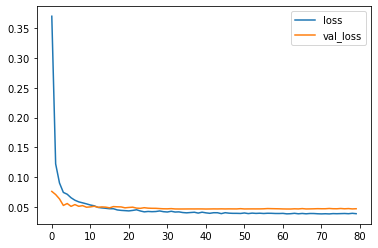

In [21]:
model_2_losses = pd.DataFrame(model_2.history.history)
model_2_losses.plot()

In [22]:
predictions = model_2.predict(x_test)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)

,Predict,Actual
0,0.597726,0.795699
1,0.585310,0.634409
2,0.650767,0.806452
3,0.672480,0.000000
4,0.586059,0.634409
5,0.704513,0.838710
6,0.629139,0.580645
7,0.617720,0.526882
8,0.678732,0.569892
9,0.675380,0.817204


In [23]:
mean_absolute_error(y_test,predictions)

0.16795562873416797

In [24]:
print("RMSE: ")
np.sqrt(mean_squared_error(y_test,predictions))

RMSE: 


0.21611426812108933